In [1]:
import numpy as np
%matplotlib inline

## Defining the generic metrics class

In [2]:
class GeneralModelClass:
    # Where k∗ is the numbers of parameters you're estimating INCLUDING an intercept. 
    #(The residual vector will exist in an n−k∗ dimensional linear space.)

    # If you include an intercept term in a regression and k refers to the number of regressors
    # not including the intercept then k∗=k+1.
    #def __init__(self, target, sq_error, )
         
    def sse(self):
        '''returns sum of squared errors (model vs actual)'''
        squared_errors = np.square(self.target - self.predict(self.data))# using target, predict and data, find the squared errors
        self.sq_error_ = np.sum(squared_errors)# find the Sum of squared errors
        return self.sq_error_
        
    def sst(self):
        '''returns total sum of squared errors (actual vs avg(actual))'''
        avg_y = np.mean(self.target)
        squared_errors = (self.target - avg_y) ** 2
        self.sst_ = np.sum(squared_errors)
        return self.sst_
    
    def r_squared(self):
        '''returns calculated value of r^2'''
        self.r_sq_ =  1- (self.sse()/self.sst())# using SST and SSE, find the R-squared value
        return self.r_sq_
    
    def adj_r_squared(self):
        '''returns calculated value of adjusted r^2'''
        self.adj_r_sq_ = 1 - (self.sse()/self._dfe) / (self.sst()/self._dft)
        return self.adj_r_sq_
    
    def rmse(self):
        '''returns calculated value of mse'''
        # using predict, data and target, find the RMSE error
        self.rmse_ = np.sqrt((np.sum(np.square(self.target-self.predict(self.data))))/7) # your code
        return self.rmse_
    
    def pretty_print_stats(self):
        '''returns report of statistics for a given model object'''
        print(self.adj_r_squared())
        ##items = (  ('r^2:', self.r_squared()), 
          ##        ('adj_r^2:', self.adj_r_squared()))
       ## '''for item in items:
         ##   print('{0:8} {1:.4f}'.format(item[0], item[1]))'''


## Defining the Linear Regression Class

In [3]:
# only makes sense for Linear Regression https://stats.stackexchange.com/questions/23128/solving-for-regression-parameters-in-closed-form-vs-gradient-descent
class LinearRegression_(GeneralModelClass):
    
    
    def __init__(self, fit_intercept=True):
        self.coef_ = None
        self.intercept_ = None
        self._fit_intercept = fit_intercept
          
        
    def fit(self, X, y):
        """
        Fit model coefficients.

        Arguments:
        X: 1D or 2D numpy array 
        y: 1D numpy array
        """
         #degrees of freedom population dep. variable variance -- this is total amount of degrees
        self._dft = X.shape[0] - 1   
        # degrees of freedom for the residuals
        self._dfe = X.shape[0] - X.shape[1] - 1  # the more independent variables, the less adj_R-sq
        
        # training data & ground truth data
        self.data = X
        self.target = y
                
        # check if X is 1D or 2D array
        if len(X.shape) == 1:
            X = X.reshape(-1,1)
            
        # add bias if fit_intercept
        if self._fit_intercept:
            X = np.c_[X, np.ones((X.shape[0]))]
        
        # closed form solution. using normal equations to find the coeffiecents
        xTx = np.dot(np.transpose(X),X )# using X transposed and X matrices, find the data covariance matrix (X.T ?operator? X)
        inverse_xTx = np.linalg.inv(xTx) # find the inverse of the cov matrix, i.e. the precision matrix
        xTy = np.dot(np.transpose(X),y)# find X.transposed times y using ?what? operator
        coef = np.dot(inverse_xTx, xTy)
        
        # set attributes
        if self._fit_intercept:
            self.intercept_ = coef[0] # set the 0th coefficient as the intercept
            self.coef_ = coef[1:] # the remaining coefficients go here
        else:
            self.intercept_ = 0 # otherwise set intercept to be 0
            self.coef_ = coef
            
    def predict(self, X):
        """Output model prediction.

        Arguments:
        X: 1D or 2D numpy array 
        """
        # check if X is 1D or 2D array
        if len(X.shape) == 1:
            X = X.reshape(-1,1)  # force 1D array into a column vector
        return self.intercept_+ np.dot(X,self.coef_) #using intercept, coefficients and X and linear regression formula, find the predictions
    
    def __str__(self):
        return "Results: b: {}, m: {}, Final Total error: {}".format(round(self.b, 2), round(self.m, 2), round(self.compute_error(), 2))

## The Problem : Housing Price Prediction

In [4]:
!pip install numpy --upgrade --user # to make sure your numpy version is updated

Requirement already up-to-date: numpy in /home/jyoti/.local/lib/python3.7/site-packages (1.17.0)


### Loading the Dataset

In [5]:
from sklearn.datasets import load_boston
import pandas as pd
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Understanding the Data using Metadata

In [6]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
boston.shape

(506, 14)

In [8]:
# find the sum of null values for each variable
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Visualizing  The Dependent Variable

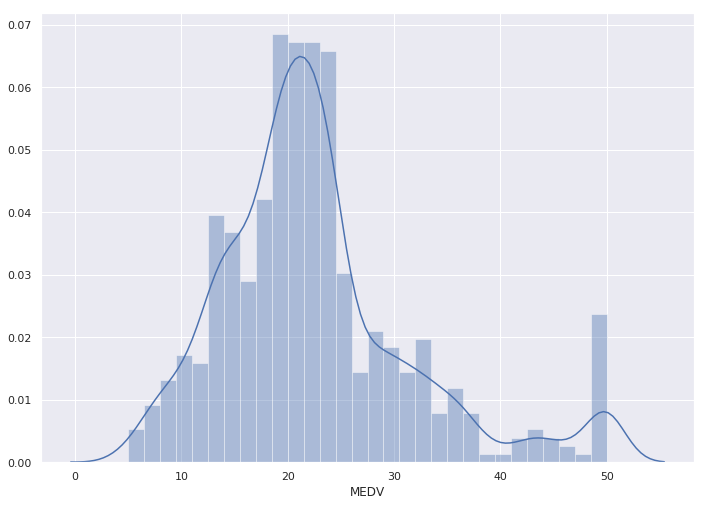

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})
# visualize the distribution of the dependent variable (KDE + 30-bin histogram)
sns.distplot(boston['MEDV'],bins=30,)

### Visualizing Pairwise Relationships

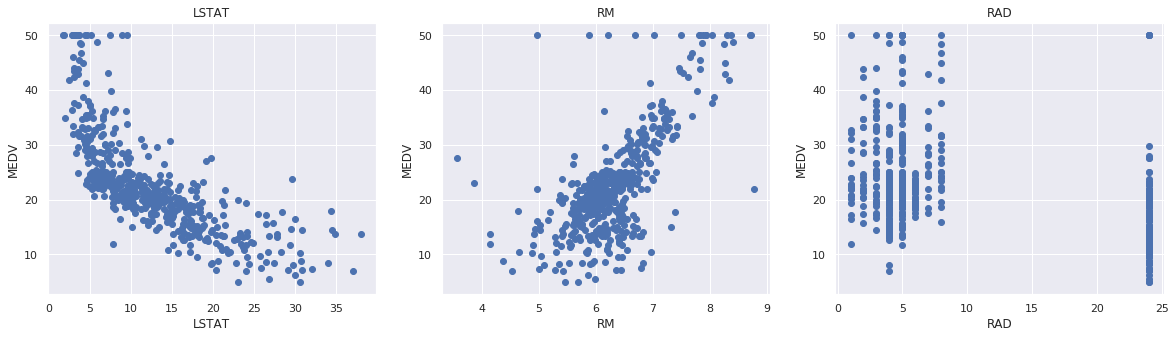

In [10]:
plt.figure(figsize=(20, 5))

# choose your own custom features here and make subplots to visualize pairwise relationships
# alternatively, you may use the pairplot
features = ['LSTAT', 'RM', 'RAD']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [11]:
x_vars = boston.columns.difference(['MEDV'])
y_vars = ['MEDV']
print(boston.columns)
print(x_vars)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')
Index(['AGE', 'B', 'CHAS', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO',
       'RAD', 'RM', 'TAX', 'ZN'],
      dtype='object')


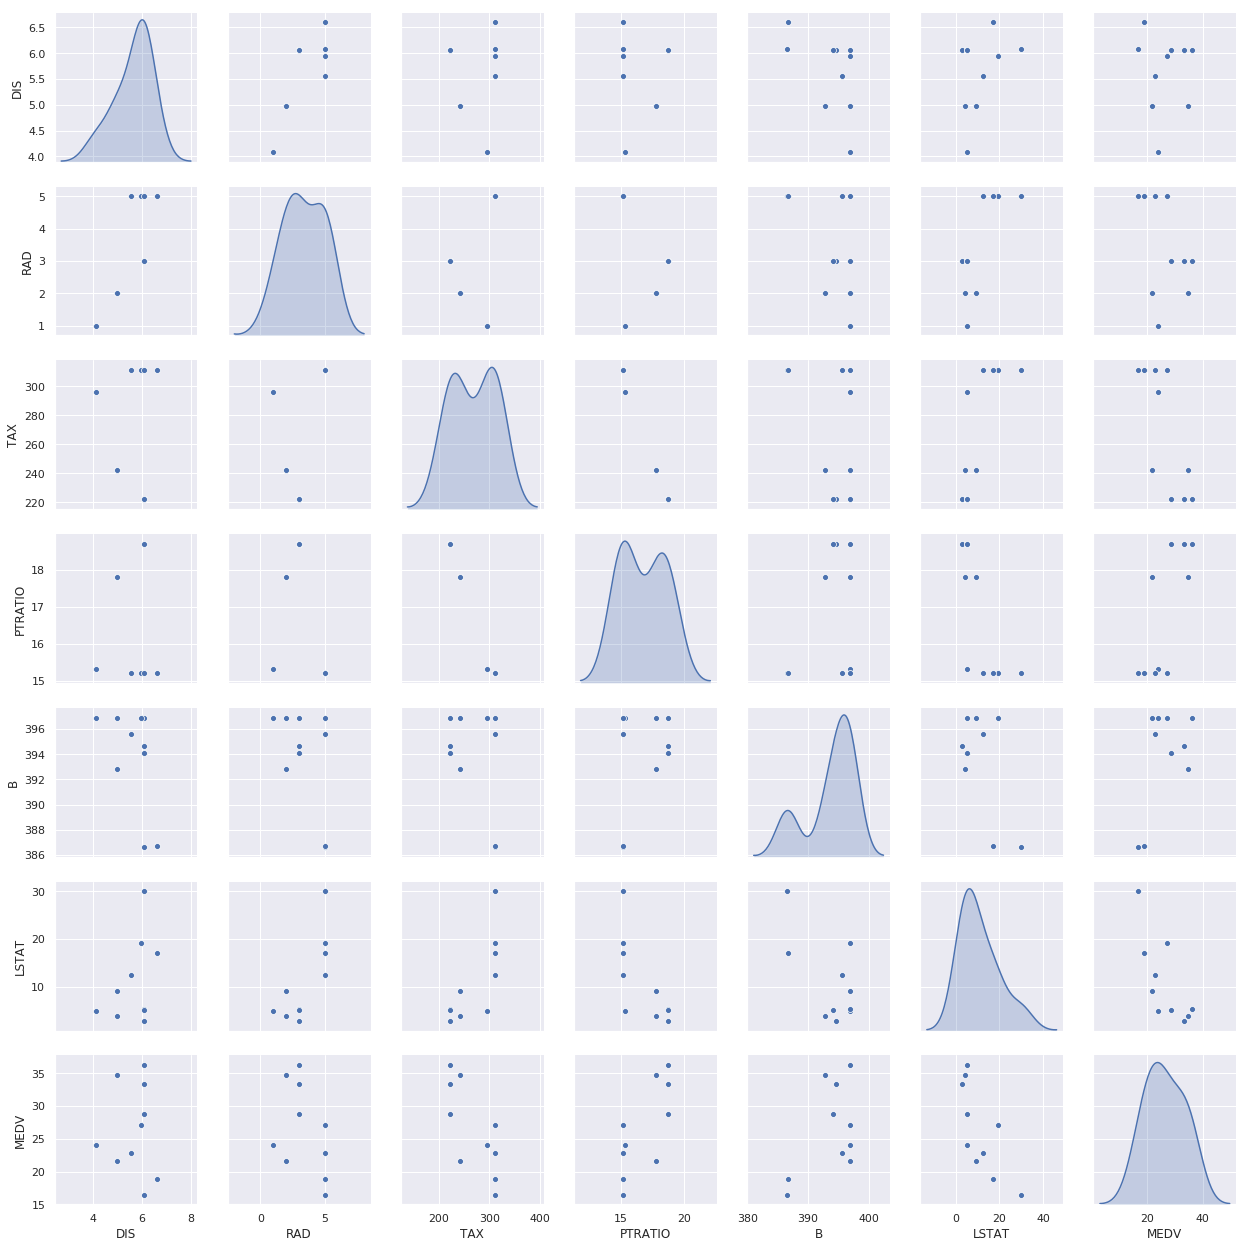

In [12]:
import seaborn as sns
#sns.pairplot(data=boston.iloc[0:10,:],x_vars=x_vars,y_vars=y_vars, hue = "RAD")
sns.pairplot(data=boston.iloc[0:10,:],vars = boston.columns[-7:],diag_kind="kde")
#sns.pairplot(data=boston.iloc[0:10,:]) runs very slowly

## Modeling

### Selecting Features Based on Correlation

In [13]:
import numpy as geek 
  
# string input 
a = geek.matrix([[1, 21, 30],  
                 [63 ,434, 3],  
                 [54, 54, 56]]) 
print(np.triu(a,k=1))
print(np.triu(a,k=-1))

[[ 0 21 30]
 [ 0  0  3]
 [ 0  0  0]]
[[  1  21  30]
 [ 63 434   3]
 [  0  54  56]]


In [14]:
df = pd.DataFrame({'a':[0,0,0,0], 'c':[1,2,3,4]})
print(df)
dd = (df.columns )
col = [col for col in df.columns if all(df[col]==0)]
print(col)

   a  c
0  0  1
1  0  2
2  0  3
3  0  4
['a']


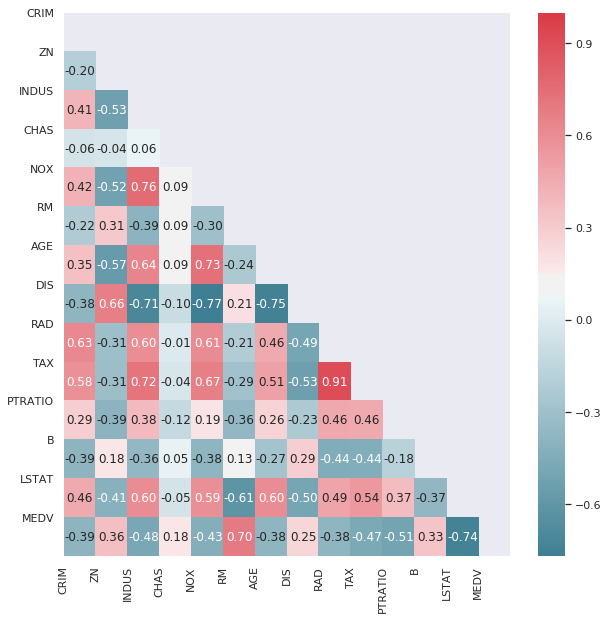

In [15]:
def doCorrelationReduction(corr_matrix = boston.corr(), original_data = boston, corr_thr=0.7):
    """Method to  select only the data with features that have low correlations between themselves"""
    
    corr_matrix_abs = corr_matrix.abs()
    upper = corr_matrix_abs.where(
        np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))  # # Select upper triangle of correlation matrix
    # # Find index of feature columns with correlation greater than threshold
    to_drop = [col for col in upper.columns if any(upper[col]>0.7)]
    # [inside the list, using upper.columns, select any column (name) that has higher correlation than corr_thr value]
    low_cor_data = upper.columns.difference(to_drop)
    # using the difference operator on the original data dataframe columns, subtract the to_drop columns

    return original_data[low_cor_data]

def heatMap(df, mirror=False):

   # Create Correlation df
   corr = df.corr()
   # Plot figsize
   fig, ax = plt.subplots(figsize=(10, 10))
   # Generate Color Map
   colormap = sns.diverging_palette(220, 10, as_cmap=True)
   
   if mirror == True:
      #Generate Heat Map, allow annotations and place floats in map
      sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
      #Apply xticks
      plt.xticks(range(len(corr.columns)), corr.columns);
      #Apply yticks
      plt.yticks(range(len(corr.columns)), corr.columns)
      #show plot

   else:
      # Drop self-correlations
      dropSelf = np.zeros_like(corr)
      dropSelf[np.triu_indices_from(dropSelf)] = True
      # Generate Color Map
      colormap = sns.diverging_palette(220, 10, as_cmap=True)
      # Generate Heat Map, allow annotations and place floats in map
      sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf)
      # Apply xticks
      plt.xticks(range(len(corr.columns)), corr.columns);
      # Apply yticks
      plt.yticks(range(len(corr.columns)), corr.columns)
   # show plot
   plt.show()
    
heatMap(df=boston)
boston_corr_reduced = doCorrelationReduction()

### Notice Any Dimensionality Reduction?

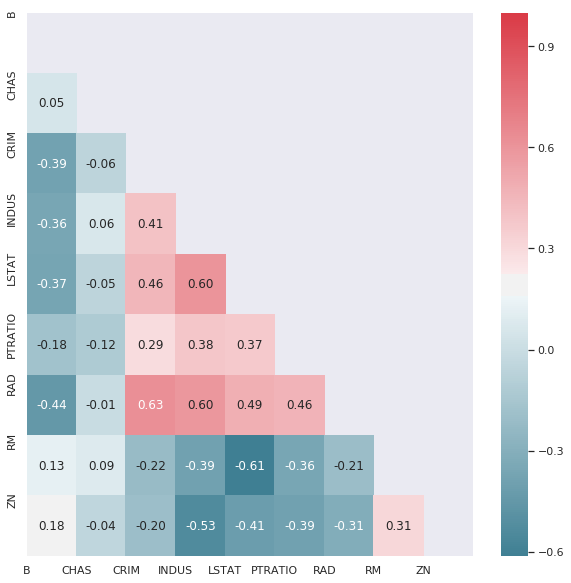

In [16]:
heatMap(df=boston_corr_reduced)

### Splitting Data for Measuring Generalization Error

In [17]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


### Linear Regression Using Your Own OOP Implementation

In [18]:
# importlib.reload(mymodule), # https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
general_model = GeneralModelClass()
linreg_model = LinearRegression_(general_model)
linreg_model.__dict__
linreg_model.fit(X=X_train,y=Y_train)
linreg_model.pretty_print_stats()
X_train.shape[0]

-46.883261949586064


404

In [19]:
import inspect
lines = inspect.getsource(linreg_model.pretty_print_stats)
print(lines)

    def pretty_print_stats(self):
        '''returns report of statistics for a given model object'''
        print(self.adj_r_squared())





**make sure if you add features that you transform both train and test when you transform your data**


### Linear Regression Using Statsmodels

You can implement linear regression in Python relatively easily by using the package statsmodels as well. Typically, this is desirable when there is a need for more detailed results.

In [20]:
import statsmodels.api as sm
X_constant_added = sm.add_constant(X)
model = sm.OLS(Y, X_constant_added)
results_statsmodel = model.fit()
print(results_statsmodel.summary())
print('coefficient of determination:', results_statsmodel.rsquared)
print('adjusted coefficient of determination:', results_statsmodel.rsquared_adj)
print('regression coefficients:', results_statsmodel.params)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Thu, 08 Aug 2019   Prob (F-statistic):          7.01e-112
Time:                        16:22:56   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3583      3.173     -0.428      0.6

/home/jyoti/.local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## Task : Multiple Regression Comparison with Different Libraries


In this task, your task is to predict the Median value of owner-occupied homes in $1000's in Boston, using multiple different features.

**Before you start : Split the Boston housing dataset into training and test sets using Scikit-learn train-test split function.**

- 0.0 Are the features linearly independent of each other? Show this programmatically.
- 0.1 Are the assumptions for linear regression fulfilled?

[assumptions](https://towardsdatascience.com/verifying-the-assumptions-of-linear-regression-in-python-and-r-f4cd2907d4c0)


In the next steps, we will look at some concrete models. **Remember to measure both the training and prediction times of your runs.**

0.0 Referring to the maximum likelihood notebook, implement a method to compute the negative log-likelihood.

- 1.0 Define **optimize (train)** a multiple linear regression model in Scikit-Learn with all features
- 1.1 Define **optimize (train)** a multiple linear regression model in Scikit-Learn with low correlated features

[Scikit Lin Reg](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

**What fitting methods are available here?**


- 3.0 Define and **optimize (train)** a multiple linear regression model in statsmodels with all features
- 3.1  Define and **optimize (train)** a multiple linear regression model in statsmodels with low correlated features

[Statsmodels Lin Reg](https://www.statsmodels.org/stable/regression.html)

"This module allows estimation by ordinary least squares (OLS), weighted least squares (WLS), generalized least squares (GLS), and feasible generalized least squares with autocorrelated AR(p) errors."

- Which library (statsmodels or Scikit-learn) allows for more flexible fitting procedure?


- 5. Remember that the training error is not a good metric for evaluation how well a model generalizes. That's why you should now compare the results by MSE achieved on the test set. 


- Which model generalizes the best? Plot the MSE VS neg-log-likelihood for each of the models. Why does the graph look like it does?
- Did you see any significant improvement in generalization by eliminating features that are highly correlated to others?
- Was there any considerable speed differences between the runtimes of the model? Did you use GPU or not?



### BONUS POINT QUESTIONS (+1.5 %):

----------------------------------------------------------
- 2.0 Define and **optimize (train)** a multiple **polynomial** regression model in Scikit-Learn with all features
- 2.1 Define and **optimize (train)** a multiple **polynomial** regression model in Scikit-Learn with low correlated features

OR

- Use Bayesian Feature Selection (refer to the appropriate method in SkLearn or Lasso to Select the best performing features).

---------------------------------------------------------------------
AND

- 4.0 Define and **optimize (train)** a multiple linear regression model in Pytorch with all features
- 4.1 Define and **optimize (train)** a multiple linear regression model in Pytorch with low correlated features


**What needs to be included** :

Answers to the previously mentioned questions, but now comparing all the trained models between each other:

- Which model generalizes the best?  Plot the MSE VS neg-log-likelihood for each of the models. Why does the graph look like it does?
- Did you see any significant improvement in generalization by eliminating features that are highly correlated to others?
- Was there any considerable speed differences between the runtimes of the model? Did you use GPU or not?

##### Referring to the maximum likelihood notebook, implement a method to compute the negative log-likelihood.

In [71]:
likelihood_df = pd.concat([X_train_corr, Y_train_corr],axis=1)
train_likeli = likelihood_df[:-1]
train_likeli.shape[0]

(likelihood_df.iloc[:,:-1]).shape

(404, 9)

In [72]:
# define likelihood function

def neg_log_likelihood(params, likelihood_df):
    """ Computes the """
    X_train_likelihood = likelihood_df.iloc[:,:-1]
    intercept = np.ones( X_train_likelihood.shape[0])
    beta = params # inputs are guesses at our parameters
    sd = params[-1]
    yhat =  intercept + np.dot( X_train_likelihood,beta[:-1]) # predictions
    # to find the negative log likelihood, sum the log densities as according to the likelihood function formula
    negative_log_likelihood = -np.sum(stats.norm.logpdf(likelihood_df['MEDV'], loc=yhat, scale=sd) )
    return(negative_log_likelihood)


# let's start with some random coefficient guesses and optimize
guess = np.random.randn(len(likelihood_df.columns))
#results = minimize(neg_log_likelihood, guess, likelihood_df, method = 'Nelder-Mead',options={'disp': True})

# drop results into df and round to match statsmodels
#results
resultsdf = pd.DataFrame({'coef':results['x']})
#resultsdf.index=['constant','x','sigma']
resultsdf


,coef
0,0.026935
1,0.011765
2,2.213818
3,-0.374213
4,-0.740927
5,-0.259640
6,0.238070
7,4.298709
8,-0.030966
9,4.388933


##### Before you start : Split the Boston housing dataset into training and test sets using Scikit-learn train-test split function.


In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(boston[boston.columns.difference(['MEDV'])], boston['MEDV'], test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


##### 0.0 Are the features linearly independent of each other? Show this programmatically.


A way of finding if features are linearly independent of each other is by finding the rank of matrix. We know that the maximum number of linarly independent columns in a matrix is called the column rank of that matrix.

In [136]:
rank = np.linalg.matrix_rank(boston)
print('The rank of matrix is ', rank)
if rank == len(boston.columns):
    print(" A full-rank data matrix, no linearly dependent features!")
    
else :
    print("Some features are linearly dependent!")

The rank of matrix is  14
 A full-rank data matrix, no linearly dependent features!


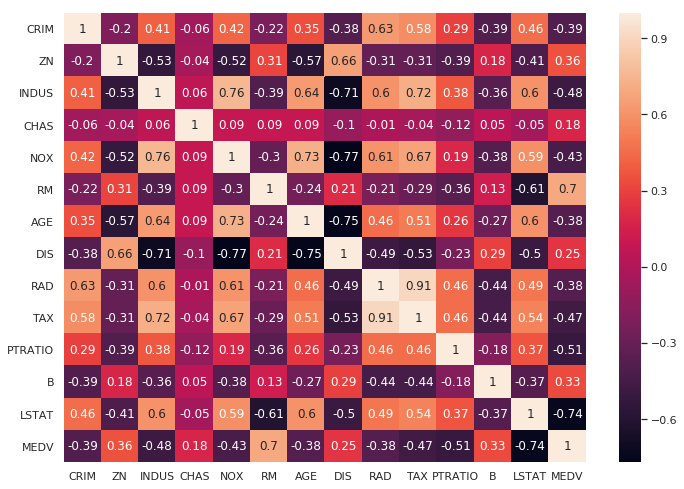

In [22]:

correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

###### 0.1 Are the assumptions for linear regression fulfilled?
We saw in corrleation matrix that colinearity exist among features. So, this might violate the assumptions of linear regression. Later, we will also see some other test, like if Error terms are normally distributed with mean 0 and Error terms have constant variance i.e. there is no heteroscedasticity.

##### In the next steps, we will look at some concrete models. Remember to measure both the training and prediction times of your runs.

- 0.0 Referring to the maximum likelihood notebook, implement a method to compute the negative log-likelihood.

- 1.0 Define optimize (train) a multiple linear regression model in Scikit-Learn with all features
- 1.1 Define optimize (train) a multiple linear regression model in Scikit-Learn with low correlated features


##### 1.0 Define optimize (train) a multiple linear regression model in Scikit-Learn with all features

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
## Training the model 
%time
regressor = LinearRegression(normalize=True)  
regressor.fit(X_train, Y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 10.7 µs


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [25]:
## showing the coefficent of each variable
coeff_df = pd.DataFrame(regressor.coef_, X_train.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
AGE,0.001119
B,0.011749
CHAS,2.705366
CRIM,-0.130800
DIS,-1.493081
INDUS,0.001095
LSTAT,-0.594076
NOX,-15.957050
PTRATIO,-0.952370
RAD,0.364422


In [26]:
## Now predicting on test data 
%time
y_pred = regressor.predict(X_test)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 8.58 µs


In [27]:
df_prediction = pd.DataFrame({'Real': Y_test, 'Predicted': y_pred})
df_prediction.head(25)

,Real,Predicted
226,37.6,37.563118
292,27.9,32.144451
90,22.6,27.065736
373,13.8,5.670806
273,35.2,35.099826
417,10.4,5.858037
503,23.9,27.537085
234,29.0,31.810192
111,22.8,26.356348
472,23.2,22.772087


In [50]:
## calculating some performance metric of model 
mse_all_sci = mean_squared_error(Y_test, y_pred)
 
print('Mean Squared Error:', mean_squared_error(Y_test, y_pred)) 
print('R² error:', r2_score(Y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, y_pred)))

Mean Squared Error: 20.86929218377094
R² error: 0.733449214745306
Root Mean Squared Error: 4.568292042303222


##### Checking if linear regression condition are fulfilled. First we check if residual follows nearly normal distribution

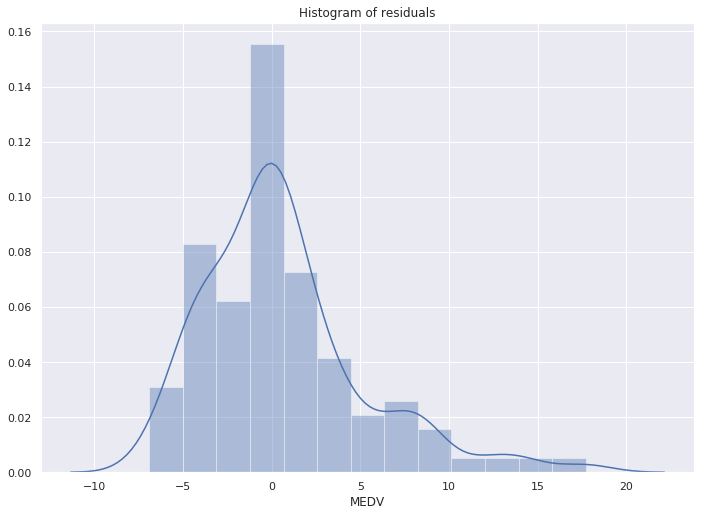

In [54]:
residuals = (Y_test- y_pred)
ax = sns.distplot(residuals, kde=True)
ax.set_title('Histogram of residuals')
plt.show()

From above histogram of residuals we can see that  is right skewed. Histogram shows that residual is not gaussian distributed. This voilates one of the assumption of linear regression.

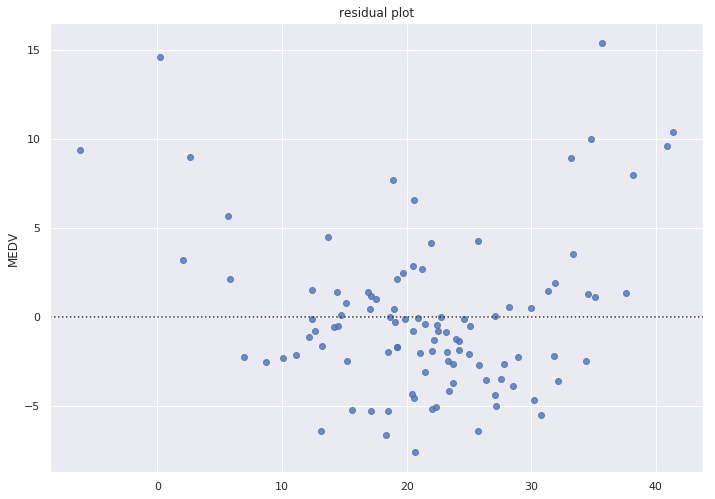

In [55]:
#import seaborn_qqplot as sqp
#sns.qqplot(residuals)
ax = sns.residplot(y_pred, Y_test)
ax.set_title('residual plot')
plt.show()

Now, we plot residual plot to check if error terms have constant variance i.e. there is no heteroscedasticity. If there is a definite pattern (like linear or quadratic or funnel shaped) obtained from the plot then heteroscedasticity is present. Ideally, residual values should be equally and randomly spaced around the horizontal axis. From above residual plot we can even though we do not see any pattern but also variance of residuals are not equal, meaning they are having higher variance.

(array([-2.46910766, -2.1336363 , -1.93974661, -1.79944435, -1.68760881,
        -1.59360615, -1.5118886 , -1.43917788, -1.37336772, -1.31302066,
        -1.2571097 , -1.20487427, -1.1557345 , -1.10923759, -1.06502277,
        -1.02279759, -0.9823215 , -0.943394  , -0.90584606, -0.86953373,
        -0.83433329, -0.80013752, -0.76685278, -0.73439673, -0.7026965 ,
        -0.67168722, -0.64131082, -0.611515  , -0.58225249, -0.55348033,
        -0.52515927, -0.49725335, -0.46972944, -0.44255691, -0.41570731,
        -0.38915415, -0.36287262, -0.3368394 , -0.31103252, -0.28543117,
        -0.26001558, -0.23476687, -0.20966696, -0.18469848, -0.15984463,
        -0.13508914, -0.11041618, -0.08581026, -0.06125619, -0.03673901,
        -0.01224389,  0.01224389,  0.03673901,  0.06125619,  0.08581026,
         0.11041618,  0.13508914,  0.15984463,  0.18469848,  0.20966696,
         0.23476687,  0.26001558,  0.28543117,  0.31103252,  0.3368394 ,
         0.36287262,  0.38915415,  0.41570731,  0.4

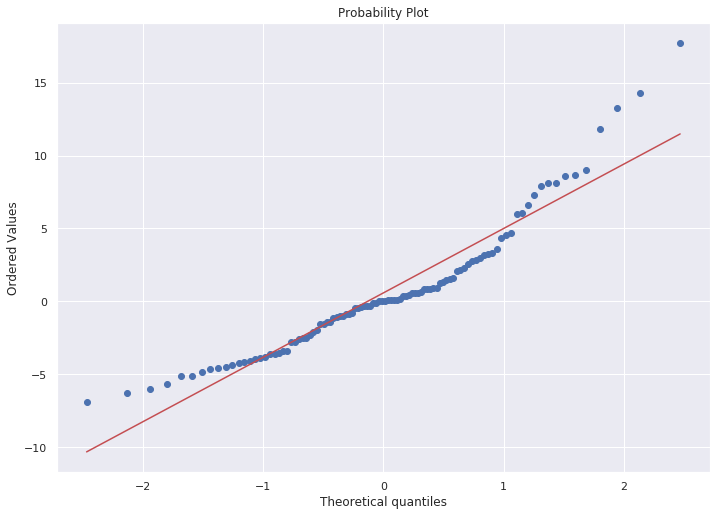

In [56]:
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

#import matplotlib.pyplot as plt
stats.probplot(residuals, plot = plt,dist='norm', fit=False, rvalue=False)
#qqplot(residuals, line = '45')

##### 1.1 Define optimize (train) a multiple linear regression model in Scikit-Learn with low correlated features

In [32]:
x_data = boston[boston.columns.difference(['MEDV'])]
y_data = boston['MEDV']
print('shape of original data', x_data.shape)

## select the feature based on correlation setting threshold to 0.8
low_corr_data = doCorrelationReduction(corr_matrix = x_data.corr(), original_data = x_data, corr_thr=0.8)
print('shape of data after removing features', low_corr_data.shape)  # shape of data after removing correlated features 
low_corr_data.head()

shape of original data (506, 13)
shape of data after removing features (506, 9)


,AGE,B,CHAS,CRIM,LSTAT,PTRATIO,RAD,RM,ZN
0,65.2,396.90,0.0,0.00632,4.98,15.3,1.0,6.575,18.0
1,78.9,396.90,0.0,0.02731,9.14,17.8,2.0,6.421,0.0
2,61.1,392.83,0.0,0.02729,4.03,17.8,2.0,7.185,0.0
3,45.8,394.63,0.0,0.03237,2.94,18.7,3.0,6.998,0.0
4,54.2,396.90,0.0,0.06905,5.33,18.7,3.0,7.147,0.0


In [33]:
X_train_corr, X_test_corr, Y_train_corr, Y_test_corr = train_test_split(low_corr_data, y_data, test_size = 0.2, random_state=5)
print(X_train_corr.shape)
print(X_test_corr.shape)
print(Y_train_corr.shape)
print(Y_test_corr.shape)


(404, 9)
(102, 9)
(404,)
(102,)


In [34]:
## Training the model with reduced features
%time
regressor = LinearRegression(normalize=True)  
regressor.fit(X_train_corr, Y_train_corr)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 8.34 µs


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [35]:
## Now predicting on test data 
%time
y_pred_corr = regressor.predict(X_test_corr)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 6.91 µs


In [51]:
## calculating some performance metric of model 
mse_corr_sci= mean_squared_error(Y_test_corr, y_pred_corr)
 
print('Mean Squared Error:', mean_squared_error(Y_test_corr, y_pred_corr)) 
print('R² error:', r2_score(Y_test_corr, y_pred_corr)) 
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test_corr, y_pred_corr)))

Mean Squared Error: 25.19948832832937
R² error: 0.6781422511705433
Root Mean Squared Error: 5.019909195227476


#### 3.0 Define and optimize (train) a multiple linear regression model in statsmodels with all features


In [121]:
X_constant_added = sm.add_constant(X_train)
X_constant_added_test = sm.add_constant(X_test)
model = sm.OLS(Y_train, X_constant_added)
results_statsmodel = model.fit()
print(results_statsmodel.summary())
print('coefficient of determination:', results_statsmodel.rsquared)
print('adjusted coefficient of determination:', results_statsmodel.rsquared_adj)
print('regression coefficients:', results_statsmodel.params)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     84.65
Date:                Fri, 09 Aug 2019   Prob (F-statistic):          8.21e-105
Time:                        20:46:40   Log-Likelihood:                -1202.0
No. Observations:                 404   AIC:                             2432.
Df Residuals:                     390   BIC:                             2488.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.9125      5.775      6.565      0.0

/home/jyoti/.local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [75]:
## Now, testing on the test set 
pred_stat_all_feat = results_statsmodel.predict(X_constant_added_test) 
#mean_squared_error(Y_test_corr, y_pred_corr)
#(pred_stat_all_feat[:10])
mse_stat_all = mean_squared_error(Y_test, pred_stat_all_feat) 
mse_stat_all 


20.869292183770913

##### 3.1 Define and optimize (train) a multiple linear regression model in statsmodels with low correlated features

In [74]:
X_constant_added_corr = sm.add_constant(X_train_corr)
X_constant_added_test_corr = sm.add_constant(X_test_corr)
model_corr = sm.OLS(Y_train_corr, X_constant_added_corr)
results_statsmodel_corr = model_corr.fit()
#print(results_statsmodel.summary())
print('coefficient of determination:', results_statsmodel_corr.rsquared)
print('adjusted coefficient of determination:', results_statsmodel_corr.rsquared_adj)
print('regression coefficients:', results_statsmodel_corr.params)

coefficient of determination: 0.701278704719752
adjusted coefficient of determination: 0.6944551218326398
regression coefficients: const      17.399581
AGE         0.015529
B           0.012688
CHAS        2.936968
CRIM       -0.102212
LSTAT      -0.637078
PTRATIO    -0.992479
RAD         0.134755
RM          3.924817
ZN          0.006161
dtype: float64


/home/jyoti/.local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [76]:
## Now, testing on the test set 
pred_stat_corr = results_statsmodel_corr.predict(X_constant_added_test_corr) 
#mean_squared_error(Y_test_corr, y_pred_corr)
#(pred_stat_all_feat[:10])
mse_stat_corr = mean_squared_error(Y_test_corr, pred_stat_corr) 
mse_stat_corr

25.19948832832942

##### Final MSE result

In [81]:
Mean_squared_error = [mse_all_sci,mse_corr_sci,mse_stat_all,mse_stat_corr ]
Mean_squared_error

[20.86929218377094, 25.19948832832937, 20.869292183770913, 25.19948832832942]

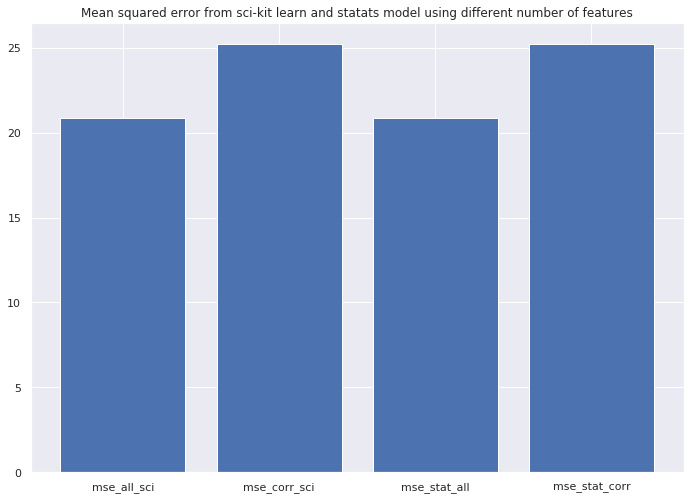

In [80]:
Mean_squared_error = [mse_all_sci,mse_corr_sci,mse_stat_all,mse_stat_corr ]
x_values = ['mse_all_sci','mse_corr_sci','mse_stat_all','mse_stat_corr' ]
y_pos = np.arange(len(Mean_squared_error ))
 
# Create bars
plt.bar( y_pos,Mean_squared_error)
 
# Create names on the x-axis
plt.xticks(y_pos, x_values)
plt.title('Mean squared error from sci-kit learn and statats model using different number of features')
 
# Show graphic
plt.show()


##### Which library (statsmodels or Scikit-learn) allows for more flexible fitting procedure?
I find Scikit-learn more flexible for classificatio or fitting regression. Sci-kit learn has nice data pipe system for preprocessing to fitting model.

###### Remember that the training error is not a good metric for evaluation how well a model generalizes. That's why you should now compare the results by MSE achieved on the test set.Which model generalizes the best? Plot the MSE VS neg-log-likelihood for each of the models. Why does the graph look like it does?Did you see any significant improvement in generalization by eliminating features that are highly correlated to others?

In [113]:
intercept=regressor.intercept_ 
intercept

17.39958141243683

In [122]:

def neg_log_likelihood_all(params, x_test, y_test, inter):
    """ Computes the """
    
    intercept = np.full( x_test.shape[0],inter)
    beta = params # inputs are guesses at our parameters
    sd = 4.388933
    yhat =  intercept + np.dot( x_test,beta) # predictions
    # to find the negative log likelihood, sum the log densities as according to the likelihood function formula
    negative_log_likelihood = -np.sum(stats.norm.logpdf(y_test, loc=yhat, scale=sd) )
    return(negative_log_likelihood)


##### Printing the -neg log likelihood value using the intercept and coefficient from sci kit learn model

In [127]:
intercept=regressor.intercept_ 
coeff_scikit = coeff_df.values.tolist()
print(coeff_df)
#coeff_scikit
#print(X_test.head())
log_like_scikit=(neg_log_likelihood_all(coeff_scikit, X_test, Y_test, intercept))
print('The log likelihood value using the parameter from scikit learn model is ', log_like_scikit)

         Coefficient
AGE         0.001119
B           0.011749
CHAS        2.705366
CRIM       -0.130800
DIS        -1.493081
INDUS       0.001095
LSTAT      -0.594076
NOX       -15.957050
PTRATIO    -0.952370
RAD         0.364422
RM          3.413973
TAX        -0.013172
ZN          0.049403
The log likelihood value using the parameter from scikit learn model is  186690.29908478842


#####  Printing the -neg log likelihood value using the intercept and coefficient from stats model

In [124]:
coefficients_stats = results_statsmodel.params
(coefficients_stats)
#print(neg_log_likelihood_all(coefficients, X_test, Y_test, intercept))

const      37.912487
AGE         0.001119
B           0.011749
CHAS        2.705366
CRIM       -0.130800
DIS        -1.493081
INDUS       0.001095
LSTAT      -0.594076
NOX       -15.957050
PTRATIO    -0.952370
RAD         0.364422
RM          3.413973
TAX        -0.013172
ZN          0.049403
dtype: float64

In [125]:
log_like_stats=(neg_log_likelihood_all(coefficients_stats[1:], X_test, Y_test, coefficients_stats[0]))
print('The log likelihood value using the parameter from stats model is ', log_like_stats)

The log likelihood value using the parameter from stats model is  299.8520426442833


#####  Define and optimize (train) a multiple linear regression model in statsmodels with low correlated features

In [ ]:
## predicted response
print('predicted response:', results.fittedvalues, sep='\n')
print('predicted response:', results.predict(x), sep='\n')


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

linreg_model_sklearn = LinearRegression().fit(x=X, y=Y)
transformer = PolynomialFeatures(degree=2, include_bias=False)
X_with_polynomial =  transformer.transform(x=X)



In [ ]:
## Comparison of Predictions
y_pred_own = linreg_model.predict(X=X_test)
y_pred_sklearn = linreg_model_sklearn.predict(x=X_test)


### Linear Independence / Dependence
[stats stackexchange reference](https://stats.stackexchange.com/questions/92522/linearly-dependent-features)


In [ ]:
from numpy.linalg import matrix_rank
if matrix_rank(boston.values) == len(boston.columns):
    print("You have a full-rank data matrix, no linearly dependent features!")
else :
    print("Some features are linearly dependent!")


In [41]:
from scipy.optimize import minimize

,coef
0,0.061867
1,0.022030
2,-9.780941
3,-0.140889
4,-0.674629
5,-0.617162
6,0.115906
7,4.764654
8,0.020226


In [ ]:
X_train_corr.shape